In [94]:
import pandas as pd

df = pd.read_excel (r'ANZ synthesised transaction dataset.xlsx')
print (df)

           status  card_present_flag bpay_biller_code         account  \
0      authorized                1.0              NaN  ACC-1598451071   
1      authorized                0.0              NaN  ACC-1598451071   
2      authorized                1.0              NaN  ACC-1222300524   
3      authorized                1.0              NaN  ACC-1037050564   
4      authorized                1.0              NaN  ACC-1598451071   
...           ...                ...              ...             ...   
12038  authorized                0.0              NaN  ACC-3021093232   
12039  authorized                1.0              NaN  ACC-1608363396   
12040  authorized                1.0              NaN  ACC-3827517394   
12041  authorized                1.0              NaN  ACC-2920611728   
12042  authorized                1.0              NaN  ACC-1443681913   

      currency       long_lat txn_description  \
0          AUD  153.41 -27.95             POS   
1          AUD  153.41 -2

In [95]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [96]:
df.shape

(12043, 23)

In [9]:
pip install seaborn

     |████████████████████████████████| 285 kB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 42 kB/s  eta 0:00:01    |██████▏                         | 5.5 MB 5.4 MB/s eta 0:00:05     |██████████████████▎             | 16.2 MB 7.0 MB/s eta 0:00:02     |██████████████████████▊         | 20.1 MB 7.0 MB/s eta 0:00:02
Note: you may need to restart the kernel to use updated packages.


In [10]:
import seaborn as sns

<AxesSubplot:>

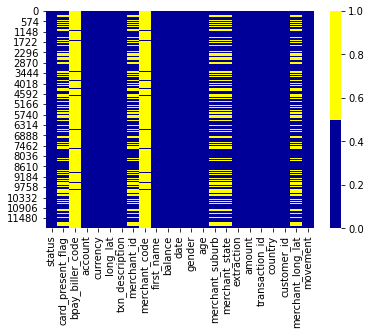

In [97]:
cols = df.columns[:23] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [12]:
import numpy as np

In [98]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

status - 0%
card_present_flag - 36%
bpay_biller_code - 93%
account - 0%
currency - 0%
long_lat - 0%
txn_description - 0%
merchant_id - 36%
merchant_code - 93%
first_name - 0%
balance - 0%
date - 0%
gender - 0%
age - 0%
merchant_suburb - 36%
merchant_state - 36%
extraction - 0%
amount - 0%
transaction_id - 0%
country - 0%
customer_id - 0%
merchant_long_lat - 36%
movement - 0%


created missing indicator for: card_present_flag
created missing indicator for: bpay_biller_code
created missing indicator for: merchant_id
created missing indicator for: merchant_code
created missing indicator for: merchant_suburb
created missing indicator for: merchant_state
created missing indicator for: merchant_long_lat


<AxesSubplot:xlabel='index'>

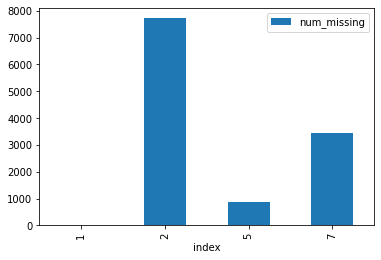

In [99]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


### Dropping columns which has more than 40% missing values 

In [100]:
df=df.drop(columns =['bpay_biller_code', 'merchant_code', ])

In [101]:
df.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement', 'card_present_flag_ismissing',
       'bpay_biller_code_ismissing', 'merchant_id_ismissing',
       'merchant_code_ismissing', 'merchant_suburb_ismissing',
       'merchant_state_ismissing', 'merchant_long_lat_ismissing',
       'num_missing'],
      dtype='object')

In [102]:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [103]:
df[df['card_present_flag'].isnull()]

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_long_lat,movement,card_present_flag_ismissing,bpay_biller_code_ismissing,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing
5,posted,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,Robert,1705.43,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
9,posted,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,Michael,466.58,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
10,posted,NaN,ACC-2171593283,AUD,146.94 -36.04,PAYMENT,NaN,Fernando,4348.50,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
11,posted,NaN,ACC-2776252858,AUD,144.95 -37.76,PAYMENT,NaN,Kristin,1203.75,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
13,posted,NaN,ACC-588564840,AUD,151.27 -33.76,INTER BANK,NaN,Isaiah,4438.16,2018-08-01,...,NaN,debit,True,True,True,True,True,True,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12027,posted,NaN,ACC-2173390920,AUD,144.71 -37.58,PHONE BANK,NaN,Luis,13537.75,2018-10-31,...,NaN,debit,True,True,True,True,True,True,True,7
12032,posted,NaN,ACC-1710017148,AUD,150.82 -34.01,PAYMENT,NaN,Michelle,20699.90,2018-10-31,...,NaN,debit,True,True,True,True,True,True,True,7
12035,posted,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,Antonio,9349.51,2018-10-31,...,NaN,debit,True,True,True,True,True,True,True,7
12036,posted,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,Matthew,18127.50,2018-10-31,...,NaN,debit,True,True,True,True,True,True,True,7


In [104]:
df.mean()

<ipython-input-104-c61f0c8f89b5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


card_present_flag                  0.802644
balance                        14704.195553
age                               30.582330
amount                           187.933588
card_present_flag_ismissing        0.359213
bpay_biller_code_ismissing         0.926513
merchant_id_ismissing              0.359213
merchant_code_ismissing            0.926679
merchant_suburb_ismissing          0.359213
merchant_state_ismissing           0.359213
merchant_long_lat_ismissing        0.359213
num_missing                        3.649257
dtype: float64

In [105]:
df['currency'].unique()

array(['AUD'], dtype=object)

In [106]:
df[['long','lat']] = pd.DataFrame(df.long_lat.str.split(' ',1).tolist(),
                                 columns = ['long','lat'])

In [107]:
BBox = ((df.long.min(),   df.long.max(),      
         df.lat.min(), df.lat.max()))

In [108]:
BBox

('114.62', '255.00', '-12.37', '-573.00')

In [113]:
dtype(df)

NameError: name 'dtype' is not defined

In [114]:
df['lat'].unique()

array(['-27.95', '-33.94', '-27.66', '-33.87', '-37.76', '-32.00',
       '-33.96', '-36.04', '-33.76', '-37.84', '-27.61', '-37.90',
       '-34.97', '-32.28', '-37.74', '-27.93', '-31.72', '-38.03',
       '-37.97', '-33.80', '-33.77', '-34.01', '-27.49', '-35.01',
       '-17.03', '-28.80', '-27.48', '-31.79', '-37.82', '-33.79',
       '-37.88', '-37.58', '-33.78', '-34.86', '-573.00', '-37.81',
       '-37.06', '-37.70', '-37.83', '-37.93', '-37.66', '-32.07',
       '-33.89', '-12.37', '-34.89', '-33.90', '-37.85', '-31.90',
       '-12.45', '-37.91', '-37.73', '-31.82', '-12.49', '-22.84',
       '-33.64', '-31.88', '-32.98', '-36.07', '-37.42', '-21.15',
       '-37.79', '-37.92', '-34.37', '-28.01', '-29.47', '-35.27',
       '-34.93', '-31.92', '-27.51', '-37.95', '-42.88', '-34.84',
       '-37.86', '-33.99', '-37.69', '-31.94', '-33.91', '-33.93',
       '-23.40', '-33.85', '-31.87', '-34.96', '-23.52', '-35.25',
       '-30.75'], dtype=object)

In [115]:
import matplotlib.pyplot as plot

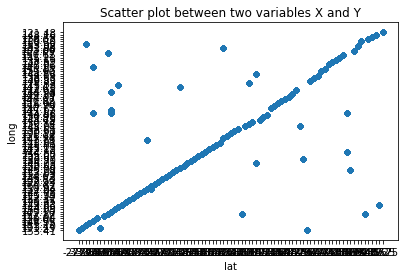

In [116]:
df.plot.scatter(x='lat', y='long', title= "Scatter plot between two variables X and Y");

plot.show(block=True);

In [117]:
df

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,card_present_flag_ismissing,bpay_biller_code_ismissing,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,False,True,False,True,False,False,False,2,153.41,-27.95
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,False,True,False,True,False,False,False,2,153.41,-27.95
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,False,True,False,True,False,False,False,2,151.23,-33.94
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,False,True,False,True,False,False,False,2,153.10,-27.66
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,False,True,False,True,False,False,False,2,153.41,-27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31,...,False,True,False,True,False,False,False,2,149.83,-29.47
12039,authorized,1.0,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31,...,False,True,False,True,False,False,False,2,151.22,-33.87
12040,authorized,1.0,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31,...,False,True,False,True,False,False,False,2,151.12,-33.89
12041,authorized,1.0,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31,...,False,True,False,True,False,False,False,2,144.96,-37.76


In [125]:
df['long'].dtypes

dtype('O')

In [133]:
df['lat'] = df['lat'].astype(float)
df['long'] = df['long'].astype(float)

<AxesSubplot:xlabel='lat'>

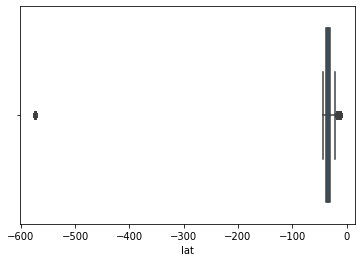

In [132]:
sns.boxplot(x=df['lat'])

<AxesSubplot:xlabel='long'>

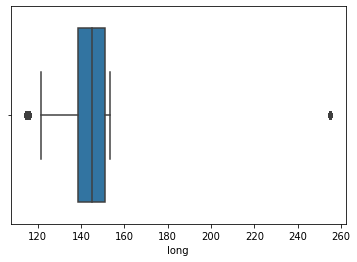

In [134]:
sns.boxplot(x=df['long'])

In [135]:
df.describe()

,card_present_flag,balance,age,amount,num_missing,long,lat
count,7717.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,14704.195553,30.582330,187.933588,3.649257,143.648563,-38.164347
std,0.398029,31503.722652,10.046343,592.599934,2.255600,16.669352,54.622791
min,0.000000,0.240000,18.000000,0.100000,1.000000,114.620000,-573.000000
25%,1.000000,3158.585000,22.000000,16.000000,2.000000,138.690000,-37.700000
50%,1.000000,6432.010000,28.000000,29.000000,2.000000,145.230000,-33.890000
75%,1.000000,12465.945000,38.000000,53.655000,7.000000,151.220000,-30.750000
max,1.000000,267128.520000,78.000000,8835.980000,7.000000,255.000000,-12.370000


In [136]:
df.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement', 'card_present_flag_ismissing',
       'bpay_biller_code_ismissing', 'merchant_id_ismissing',
       'merchant_code_ismissing', 'merchant_suburb_ismissing',
       'merchant_state_ismissing', 'merchant_long_lat_ismissing',
       'num_missing', 'long', 'lat'],
      dtype='object')

In [138]:
df['lat'].describe()

count    12043.000000
mean       -38.164347
std         54.622791
min       -573.000000
25%        -37.700000
50%        -33.890000
75%        -30.750000
max        -12.370000
Name: lat, dtype: float64

In [140]:
from scipy import stats
import numpy as np

In [141]:
z = np.abs(stats.zscore(df['lat']))
print(z)

0        0.187006
1        0.187006
2        0.077340
3        0.192315
4        0.187006
           ...   
12038    0.159177
12039    0.078621
12040    0.078255
12041    0.007403
12042    0.080452
Name: lat, Length: 12043, dtype: float64


In [142]:
threshold = 3
print(np.where(z > 3))

(array([   47,    51,    99,   392,   473,   477,   500,   531,   549,
         550,   618,   622,   625,   630,   631,   633,   847,   875,
         936,   979,  1666,  1707,  1776,  1882,  1960,  2034,  2096,
        2103,  2130,  2152,  2561,  2672,  2763,  2794,  3218,  3220,
        3235,  3241,  3300,  3461,  3480,  3494,  3502,  3512,  3549,
        3608,  3884,  3981,  4076,  4078,  4133,  4139,  4146,  4167,
        4238,  4311,  4312,  4315,  4320,  4439,  4449,  4465,  4466,
        4551,  4565,  4568,  4570,  4762,  4819,  4827,  4939,  4944,
        5364,  5476,  5516,  5526,  5546,  5678,  5709,  5720,  5773,
        5861,  5867,  6015,  6222,  6308,  6309,  6348,  6389,  6397,
        6423,  7234,  7344,  7652,  7883,  7925,  7929,  7989,  7991,
        7998,  8053,  8064,  8181,  8247,  8303,  8349,  8371,  8390,
        8416,  8799,  8821,  8943,  9109,  9218,  9507,  9703, 10045,
       10164, 10983, 11094, 11377, 11900, 12002]),)


In [150]:
print(z[:]>3)

0        False
1        False
2        False
3        False
4        False
         ...  
12038    False
12039    False
12040    False
12041    False
12042    False
Name: lat, Length: 12043, dtype: bool


In [152]:
df.columns


Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'merchant_id', 'first_name', 'balance', 'date',
       'gender', 'age', 'merchant_suburb', 'merchant_state', 'extraction',
       'amount', 'transaction_id', 'country', 'customer_id',
       'merchant_long_lat', 'movement', 'card_present_flag_ismissing',
       'bpay_biller_code_ismissing', 'merchant_id_ismissing',
       'merchant_code_ismissing', 'merchant_suburb_ismissing',
       'merchant_state_ismissing', 'merchant_long_lat_ismissing',
       'num_missing', 'long', 'lat'],
      dtype='object')

In [155]:
BBox = ((df.long.min(),df.long.max(),df.lat.min(), df.lat.max()))

AttributeError: module 'matplotlib.pyplot' has no attribute 'sho'

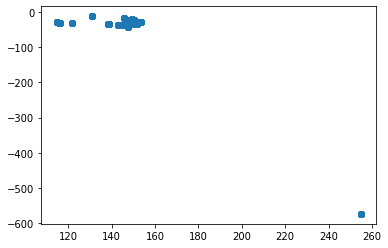

In [182]:
import matplotlib.pyplot as plt
plt.scatter(x=df['long'], y=df['lat'])
plt.sho

In [183]:
df['long'].describe()

count    12043.000000
mean       143.648563
std         16.669352
min        114.620000
25%        138.690000
50%        145.230000
75%        151.220000
max        255.000000
Name: long, dtype: float64

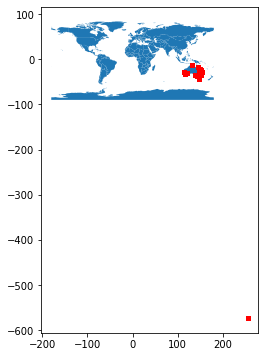

In [181]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [166]:
df.iloc[:,:10]

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01
...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,Melissa,14054.14,2018-10-31
12039,authorized,1.0,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,Robert,9137.79,2018-10-31
12040,authorized,1.0,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,Craig,45394.57,2018-10-31
12041,authorized,1.0,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,Tyler,11350.67,2018-10-31


In [164]:
df.iloc[:,10:]

,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,...,card_present_flag_ismissing,bpay_biller_code_ismissing,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat
0,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,...,False,True,False,True,False,False,False,2,153.41,-27.95
1,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,...,False,True,False,True,False,False,False,2,153.41,-27.95
2,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,...,False,True,False,True,False,False,False,2,151.23,-33.94
3,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,...,False,True,False,True,False,False,False,2,153.10,-27.66
4,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,...,False,True,False,True,False,False,False,2,153.41,-27.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,F,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,...,False,True,False,True,False,False,False,2,149.83,-29.47
12039,M,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,...,False,True,False,True,False,False,False,2,151.22,-33.87
12040,M,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,...,False,True,False,True,False,False,False,2,151.12,-33.89
12041,M,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,...,False,True,False,True,False,False,False,2,144.96,-37.76


In [169]:
df['amount'].describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

<AxesSubplot:>

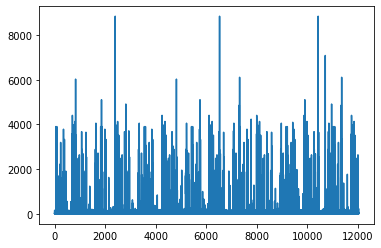

In [170]:
df['amount'].plot()

In [171]:
comparison_column = np.where(df["amount"] > df["balance"], True, False)

In [172]:
comparison_column

array([False, False,  True, ..., False, False, False])

In [173]:
df["equal"] = comparison_column

In [178]:
wrong_bal=df.loc[df['equal'] == True]

In [179]:
wrong_bal.iloc[:,8:]

,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,...,bpay_biller_code_ismissing,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat,equal
2,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,...,True,False,True,False,False,False,2,151.23,-33.94,True
15,2.85,2018-08-01,M,30,Mount Ommaney,QLD,2018-08-01T07:20:48.000+0000,10.79,28347ba260d84f8d81ab70d9e901ea8e,Australia,...,True,False,True,False,False,False,2,153.05,-27.61,True
18,38.31,2018-08-01,F,47,NaN,NaN,2018-08-01T08:00:00.000+0000,58.00,c24ca89f7aba4ab4b8d3e9ac0c5f4fab,Australia,...,True,True,True,True,True,True,7,115.72,-32.28,True
20,3.85,2018-08-01,F,26,Byron Bay,NSW,2018-08-01T08:09:42.000+0000,14.10,1c12c9ad77894ef8b507fb091e41e928,Australia,...,True,False,True,False,False,False,2,153.41,-27.95,True
43,28.04,2018-08-01,M,27,NaN,NaN,2018-08-01T10:00:00.000+0000,29.00,2bf5dc421b144a6d9f80c71d9750bbb9,Australia,...,True,True,True,True,True,True,7,144.71,-37.58,True
53,27.86,2018-08-01,F,43,Robinvale,VIC,2018-08-01T11:11:33.000+0000,28.00,3f549647f8c64c35a471c57296fa3ee3,Australia,...,True,False,True,False,False,False,2,142.77,-37.06,True
91,8.06,2018-08-01,F,20,NaN,NaN,2018-08-01T16:00:00.000+0000,35.00,1b87da4cd76d4bbc96c64e9935253f66,Australia,...,True,True,True,True,True,True,7,150.68,-33.79,True
95,43.06,2018-08-01,F,20,Brookvale,NSW,2018-08-01T16:28:40.000+0000,76.82,954d5cc3ef1c4dbe96219af4ae7d7b5a,Australia,...,True,False,True,False,False,False,2,150.68,-33.79,True
150,15.93,2018-08-02,F,18,Southbank,VIC,2018-08-02T04:53:30.000+0000,22.49,e270736b2b074f9fb88caed03a89d347,Australia,...,True,False,True,False,False,False,2,153.09,-27.48,True
162,38.55,2018-08-02,F,18,NaN,NaN,2018-08-02T08:00:00.000+0000,151.00,33084ce6fa3743998092d4f2c427071f,Australia,...,True,True,True,True,True,True,7,150.79,-33.64,True


In [184]:
df.loc[df['long'] == 255.000000]

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat,equal,geometry
47,authorized,0.0,ACC-2901672282,AUD,255.00 -573.00,SALES-POS,7ce5471b-363c-46ab-b398-ca517347829a,Daniel,1290.08,2018-08-01,...,False,True,False,False,False,2,255.0,-573.0,False,POINT (255.000 -573.000)
51,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,1195.08,2018-08-01,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)
99,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,1162.08,2018-08-01,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)
392,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,Daniel,4490.85,2018-08-03,...,True,False,True,True,True,5,255.0,-573.0,False,POINT (255.000 -573.000)
473,authorized,1.0,ACC-2901672282,AUD,255.00 -573.00,POS,ac9555e4-9c7c-486b-9e65-07e2e918dd0b,Daniel,4473.55,2018-08-04,...,False,True,False,False,False,2,255.0,-573.0,False,POINT (255.000 -573.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10983,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,11568.46,2018-10-23,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)
11094,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,11535.46,2018-10-24,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)
11377,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAY/SALARY,NaN,Daniel,14864.23,2018-10-26,...,True,False,True,True,True,5,255.0,-573.0,False,POINT (255.000 -573.000)
11900,posted,NaN,ACC-2901672282,AUD,255.00 -573.00,PAYMENT,NaN,Daniel,14824.23,2018-10-30,...,True,True,True,True,True,7,255.0,-573.0,False,POINT (255.000 -573.000)


In [190]:
df.loc[df['lat'] > 90]

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat,equal,geometry


In [191]:
import matplotlib.pyplot as plt
import datetime
import numpy as np

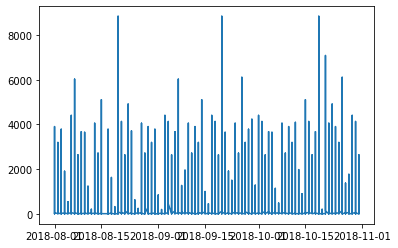

In [193]:
plt.plot(df['date'],df['amount'])
plt.show()

In [195]:
df['date'].head()

0   2018-08-01
1   2018-08-01
2   2018-08-01
3   2018-08-01
4   2018-08-01
Name: date, dtype: datetime64[ns]

In [198]:
df['year'] = df['date'].dt.year

In [221]:
df['month'] = df['date'].dt.month

In [222]:
df['month'].head()

0    8
1    8
2    8
3    8
4    8
Name: month, dtype: int64

In [223]:
df['month'].unique

<bound method Series.unique of 0         8
1         8
2         8
3         8
4         8
         ..
12038    10
12039    10
12040    10
12041    10
12042    10
Name: month, Length: 12043, dtype: int64>

In [202]:
plot_kwargs={'xticks':range(2000,2025),
 'yticks':(0,2000,4000,6000,8000),
 'grid':True,
 'fontsize':12}

In [216]:
df.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat,equal,geometry,year
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,True,False,False,False,2,153.41,-27.95,False,POINT (153.41000 -27.95000),2018
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,True,False,False,False,2,153.41,-27.95,False,POINT (153.41000 -27.95000),2018
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,True,False,False,False,2,151.23,-33.94,True,POINT (151.23000 -33.94000),2018
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,True,False,False,False,2,153.10,-27.66,False,POINT (153.10000 -27.66000),2018
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,True,False,False,False,2,153.41,-27.95,False,POINT (153.41000 -27.95000),2018


In [218]:
df['year'].unique()

array([2018])

In [217]:
df.groupby('year').agg('mean')

,card_present_flag,balance,age,amount,card_present_flag_ismissing,bpay_biller_code_ismissing,merchant_id_ismissing,merchant_code_ismissing,merchant_suburb_ismissing,merchant_state_ismissing,merchant_long_lat_ismissing,num_missing,long,lat,equal
year,,,,,,,,,,,,,,,
2018,0.802644,14704.195553,30.58233,187.933588,0.359213,0.926513,0.359213,0.926679,0.359213,0.359213,0.359213,3.649257,143.648563,-38.164347,0.004235


(2000.0, 8000.0)

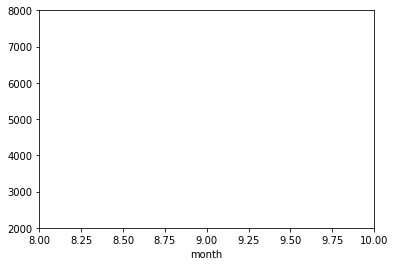

In [225]:
df.groupby(['month'])['amount'].mean().plot(kind='line')
plt.xlim(8,10)
plt.ylim(2000, 8000)

In [ ]:
df[:20]['Freedom'].plot(kind='line',xlim=(0,20),ylim=(0,100),color='red',xticks=([0,10,15,20]),yticks=([0,50,70,100])
                       title = 'xticks')

In [211]:
df['year'].unique()

array([2018])

In [214]:
pd.Series(df['year'].unique()).sort_values()

0    2018
dtype: int64

In [ ]:
df['amount']